# Classification Trees 













# Load file
Commonly two libraries are used to load a csv files.
- numpy function `np.loadtext` and `np.genfromtext ` 
- pandas function `pd.read_csv`

Here we prefer using pandas

In [1]:
import pandas as pd
path='data/'
filename = path+'spamdata.csv'
spam = pd.read_csv(filename)

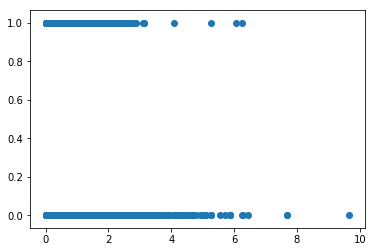

In [2]:

#features against spam, spam=1, ham=0
import matplotlib.pyplot as plt
%matplotlib inline 
plt.scatter(spam.values[:,11], spam.values[:,-1]);

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

dt = DecisionTreeClassifier(max_depth=2)
# you may play with depth and prune the tree in different levels

X = spam.values[:, :57]
y = spam.values[:, -1]

dt.fit(X,y)
spamnames = spam.columns.tolist()[:57]


In [4]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=spamnames,  
                         filled=True, rounded=True,  
                         special_characters=True)  

In [5]:
dot_data = export_graphviz(dt, out_file=None) 

In [6]:
# you need to install graphviz-python from Anaconda, it is not installed by default.
import graphviz

In [7]:
graph = graphviz.Source(dot_data) 

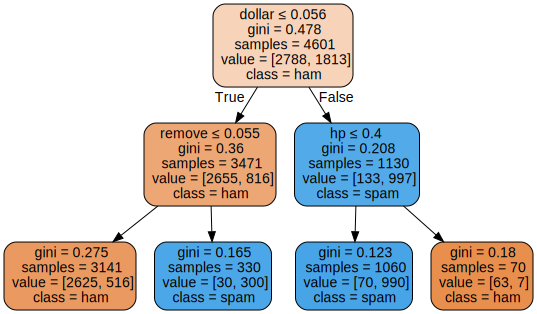

In [8]:
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=spamnames,  
                         class_names=['ham', 'spam'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [11]:
dt10 = DecisionTreeClassifier(max_depth=10)
dt11 = DecisionTreeClassifier(max_depth=11)
dt12 = DecisionTreeClassifier(max_depth=12)

# you may play with depth and prune the tree in different levels
dt10.fit(X_train,y_train)
dt11.fit(X_train,y_train)
dt12.fit(X_train,y_train)

y10_pred = dt10.predict(X_test)
y11_pred = dt11.predict(X_test)
y12_pred = dt12.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y10_pred)


0.91965255157437564

In [12]:
accuracy_score(y_test, y11_pred)

0.91639522258414763

In [13]:
accuracy_score(y_test, y12_pred)

0.92182410423452765

# Bagging


In [14]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, random_state=1)
bag.fit(X_train, y_train)
y_hat = bag.predict(X_test)
accuracy_score(y_test, y_hat)


0.94896851248642777

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(bag, X_train, y_train, cv=10).mean()

0.94157871559612405

# Boosting
Boosting focuses on difficult classifying objects and increases the precision of a classifier by re-weighting the data.
# Adaboost
Adaboost is one of the first boosting algorithms, still very common.

In [16]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators= 100, random_state=1)
adaboost.fit(X_train, y_train)
y_hat = adaboost.predict(X_test)
accuracy_score(y_test, y_hat)

0.93593919652551572

In [17]:
# One may prefer to check the accuracy on k fold cross-validation
cross_val_score(adaboost, X_train, y_train, cv=10).mean()

0.93914484614873395

# Gradient Boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gradboost = GradientBoostingClassifier(n_estimators= 100, random_state=1)
gradboost.fit(X_train, y_train)
y_hat = gradboost.predict(X_test)
accuracy_score(y_test, y_hat)

0.95005428881650378

In [19]:
cross_val_score(gradboost, X_train, y_train, cv=10).mean()

0.94375854809519544